In [1]:
from cellpose import models
import numpy as np 
from tqdm import tqdm 
import local
import sys
sys.path.append ('../')
from data_processing import SDTDataset 
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

train_dataset = SDTDataset( return_mask=True, train=True)
val_dataset = SDTDataset( return_mask=True, train=False)
train_loader = DataLoader(train_dataset, batch_size=1)
val_loader = DataLoader(val_dataset, batch_size=1)



In [6]:
def plot_result(image, pred, mask):
    plt.figure(figsize=(15, 15))
    plt.tight_layout()

    plt.subplot(1, 3, 1)
    plt.title("Image")
    plt.axis('off')
    plt.imshow(image, cmap='YlGnBu')

    plt.subplot(1, 3, 2)
    plt.title("GT")
    plt.axis('off')
    plt.imshow(mask,cmap = 'YlGnBu')

    plt.subplot(1, 3, 3)
    plt.title("Prediction")
    plt.axis('off')
    plt.imshow(pred, cmap = 'YlGnBu')

    plt.show()

In [8]:
len(train_dataset), len(val_dataset)

(382, 125)

In [10]:
model = models.Cellpose(gpu=True, model_type='cyto3')

precision_list, recall_list, accuracy_list, iou_list = [], [], [], []
for idx, (image, mask, _) in enumerate(tqdm(val_loader)):
    gt_labels = np.squeeze(mask.cpu().numpy())
    image = np.squeeze(image.cpu().numpy())
    pred_labels, _, _, _ = model.eval([image], diameter=57.8, channels=[0, 0])

    precision, recall, accuracy, iou = local.evaluate(gt_labels, pred_labels[0])
    precision_list.append(precision)
    recall_list.append(recall)
    accuracy_list.append(accuracy)
    iou_list.append(iou)


    # plot_result(image, pred_labels[0], gt_labels)


print(f"Mean Precision is {np.mean(precision_list):.3f}")
print(f"Mean Recall is {np.mean(recall_list):.3f}")
print(f"Mean Accuracy is {np.mean(accuracy_list):.3f}")
print(f"Mean IOU is {np.mean(iou_list):.3f}")

100%|██████████| 125/125 [02:12<00:00,  1.06s/it]

Mean Precision is 0.414
Mean Recall is 0.837
Mean Accuracy is 0.382
Mean IOU is 0.748


  0%|          | 0/125 [00:00<?, ?it/s]

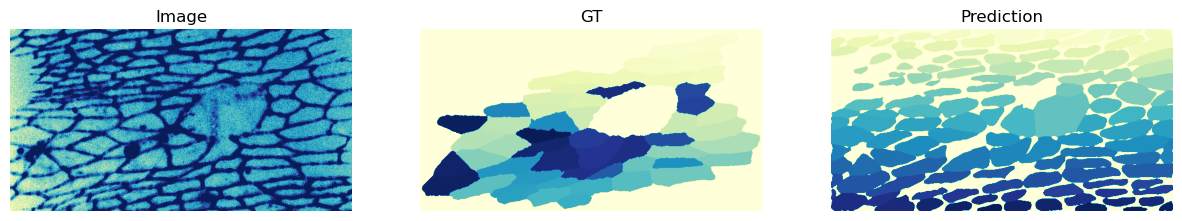

  1%|          | 1/125 [00:01<02:36,  1.27s/it]

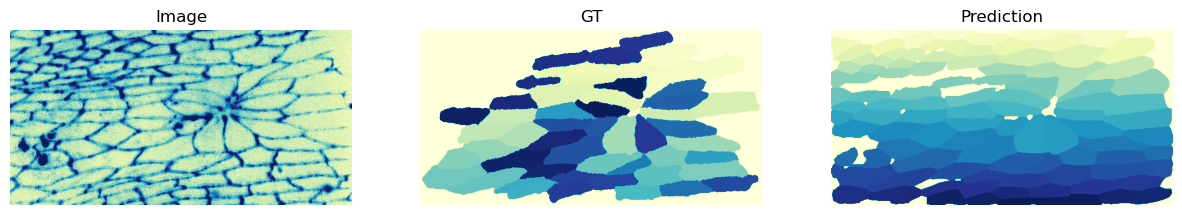

  2%|▏         | 2/125 [00:02<02:34,  1.25s/it]

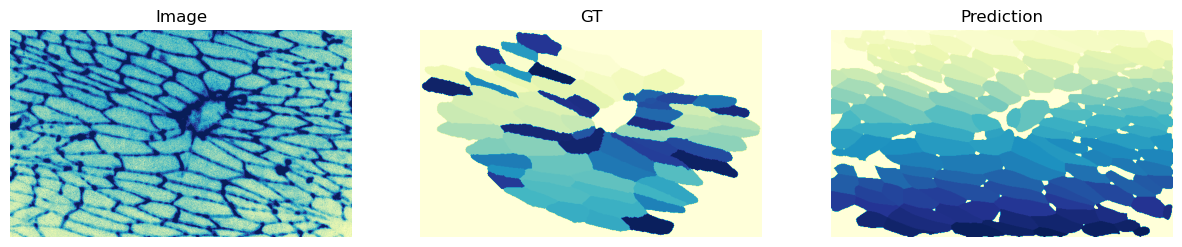

  2%|▏         | 3/125 [00:04<02:49,  1.39s/it]

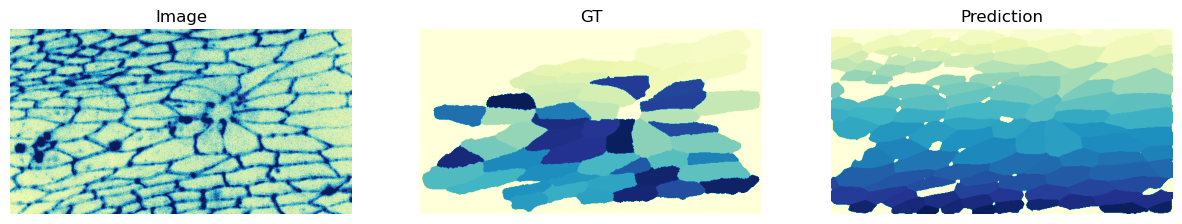

  3%|▎         | 4/125 [00:05<02:36,  1.30s/it]

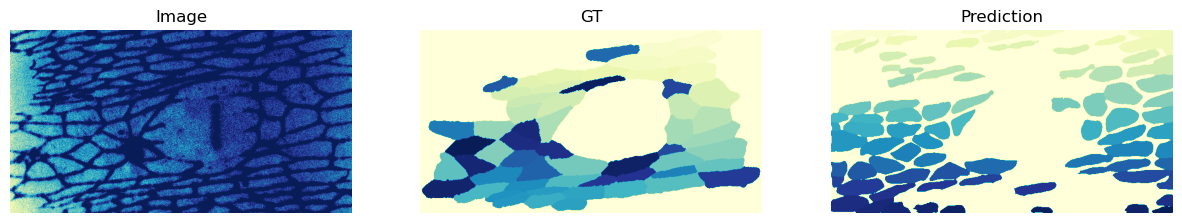

  4%|▍         | 5/125 [00:06<02:35,  1.30s/it]

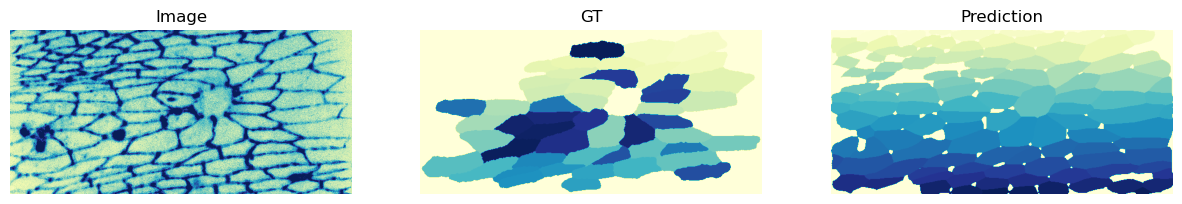

  4%|▍         | 5/125 [00:07<03:10,  1.59s/it]


In [12]:
for idx, (image, mask, _) in enumerate(tqdm(val_loader)):
    gt_labels = np.squeeze(mask.cpu().numpy())
    image = np.squeeze(image.cpu().numpy())
    pred_labels, _, _, _ = model.eval([image], diameter=57.8, channels=[0, 0])
    plot_result(image, pred_labels[0], gt_labels)
    if idx == 5:
        break